# 2. Analyze COVID Data With Bar Charts

## 2-1. Import the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2-2. Load and get information from the dataset

In [2]:
df = pd.read_csv('data/Race-COVID.csv')

In [3]:
total = np.sum(df['Cases_Total'])
white = np.sum(df['Cases_White'])
black = np.sum(df['Cases_Black'])
latin = np.sum(df['Cases_LatinX'])
asian = np.sum(df['Cases_Asian'])
aian = np.sum(df['Cases_AIAN'])
nhpi = np.sum(df['Cases_NHPI'])
unknown = np.sum(df['Cases_Unknown'])
other = total - (white + black + latin + asian + aian + nhpi + unknown)

case = np.array([white, black, latin, asian, aian, nhpi, other, unknown])

## 2-3. Create bar plot

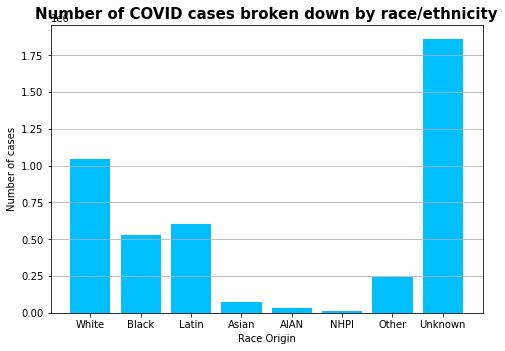

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['White','Black','Latin','Asian','AIAN','NHPI','Other','Unknown']
ax.bar(label, case, color=('deepskyblue'))
ax.set_ylabel('Number of cases')
ax.set_xlabel('Race Origin')
ax.set_title('Number of COVID cases broken down by race/ethnicity', fontweight="bold", fontsize=15)
plt.grid(axis='y')

plt.show()

Observe the 1e6 at the y axis. These numbers are multiplied by $10^6$.

Even though there are many groups involved, it is easy to see the size of different groups.

## 2-4. Create bar plot for death cases

In [3]:
total = np.sum(df['Deaths_Total'])
white = np.sum(df['Deaths_White'])
black = np.sum(df['Deaths_Black'])
latin = np.sum(df['Deaths_LatinX'])
asian = np.sum(df['Deaths_Asian'])
aian = np.sum(df['Deaths_AIAN'])
nhpi = np.sum(df['Deaths_NHPI'])
unknown = np.sum(df['Deaths_Unknown'])
other = total - (white + black + latin + asian + aian + nhpi + unknown)

case = np.array([white, black, latin, asian, aian, nhpi, other, unknown])

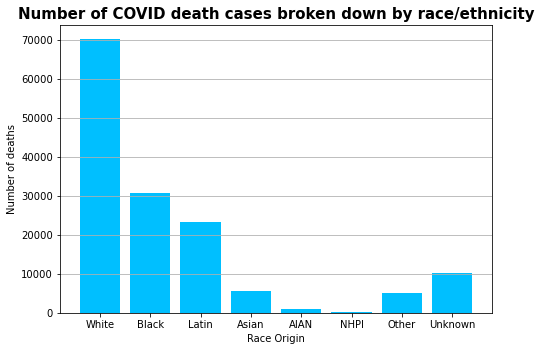

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['White','Black','Latin','Asian','AIAN','NHPI','Other','Unknown']
ax.bar(label, case, color=('deepskyblue'))
ax.set_ylabel('Number of deaths')
ax.set_xlabel('Race Origin')
ax.set_title('Number of COVID death cases broken down by race/ethnicity', fontweight="bold", fontsize=15)
plt.grid(axis='y')

plt.show()

Add labels to understand the number of death cases

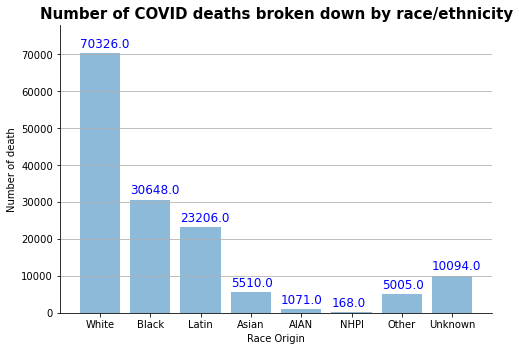

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['White','Black','Latin','Asian','AIAN','NHPI','Other','Unknown']
location = [1,2,3,4,5,6,7,8]
ax.bar(label, case, alpha=0.5)
ax.set_ylabel('Number of death')
ax.set_xlabel('Race Origin')
ax.set_ylim(0,78000)
ax.set_title('Number of COVID deaths broken down by race/ethnicity', fontweight="bold", fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for a,b in zip(location, case):
    plt.text(a-1.4, b+1500, str(b), color='b', size='large')
    
plt.grid(axis='y')

plt.show()

## Summary of Bar Charts

Advantages
- Easy to understand
- Bar charts can easily be understood even if there are many groups involved

Disadvantages
- Bar charts can be difficult to understand the values of small dataset. For example, it would be difficult for readers to understand the size of AIAN and NHPI without the labels. 

## Conclusion from these graphs

Let's inspect these graphs:
<table>
    <tr>
        <td><img src="Images/piechart-death.png" width="400"/></td>
        <td><img src="Images/barplot-death.png" width="400"/></td>
    </tr>
</table>

Just by observing these graphs, we can conclude that there are more white deaths compared to other races. It seems that the number of white deaths is more than two times the number of black or Latin deaths.

However, it is incorrect to say that white people are more likely to die from COVID compared to other races. Observe the race distribution of the U.S. below.

In [2]:
df = pd.read_csv('data/race-census.csv')

In [3]:
df

,Race,Percentage,People
0,White,61.4,"197,277,789"
1,Black,12.3,"39,445,495"
2,Hispanic,17.6,"56,510,571"
3,Asian,5.3,"16,989,540"
4,AIAN,0.7,"2,098,763"
5,NHPI,0.2,"515,522"
6,Other,2.5,"8,166,727"


This is the race/ethnicity data taken from the cencus. We will create a pie chart of this data.

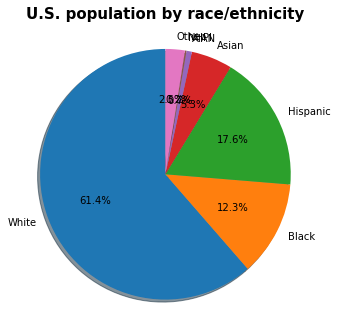

In [4]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
case = df['Percentage']
labels = ['White','Black','Hispanic','Asian', 'AIAN', 'NHPI', 'Other']

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(case, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('U.S. population by race/ethnicity',fontweight="bold", fontsize=15, pad=20)
plt.show()

Since it's really hard to see the labels, it will be important to modify this pie chart.

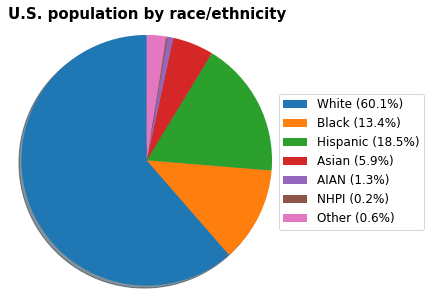

In [5]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
case = df['Percentage']
labels = ['White (60.1%)','Black (13.4%)','Hispanic (18.5%)','Asian (5.9%)',
          'AIAN (1.3%)', 'NHPI (0.2%)', 'Other (0.6%)']

fig1, ax1 = plt.subplots(figsize=(5, 5))
pie = ax1.pie(case, shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(pie[0],labels, bbox_to_anchor=(1.3,0.5), loc="center right", fontsize=12, 
           bbox_transform=plt.gcf().transFigure)
plt.title('U.S. population by race/ethnicity',fontweight="bold", fontsize=15)
plt.show()

Much better to see. Even though 60.1% of Americans are white, only 48.2% of COVID death cases are white. This suggests that white people are less likely to die from COVID compared to other race/ethnicity. We will do a detailed analysis of the race data in the next lab notebook.